<a href="https://colab.research.google.com/github/pvlakshm/AIML/blob/main/Fruits/fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
# The goal of this exercise is to learn a classification of fruit based on its
# weight and texture. After learning a classifier, we will use a sample weight
# and texture and predict what the fruit might be.

# Step 0: get the fruits data file into the Colab environment
import urllib.request

url = 'https://raw.githubusercontent.com/pvlakshm/AIML/refs/heads/main/Fruits/fruits.xlsx'
filename = 'fruits.xlsx'
urllib.request.urlretrieve(url, filename)

('fruits.xlsx', <http.client.HTTPMessage at 0x78b538fdc290>)

In [238]:
# Step 1: read in the data into a dataframe
import pandas as pd
df = pd.read_excel('fruits.xlsx')
df.head()

,Weight,Texture,Fruit
0,130,Bumpy,Orange
1,131,Bumpy,Orange
2,132,Bumpy,Orange
3,136,Bumpy,Orange
4,139,Bumpy,Orange


In [239]:
# ======== Decisiontree ========
# Looking at the data from the excel file, we can classify the fruit as follows:
#   # we start with a heterogenous sample of size 15 => [5, 5, 5].
#   if (weight < 140)
#       fruit is Orange (regardless of the texture).
#       # we have classified 5 samples => [0, 5, 0]
#   if (weight >= 140)
#       # fruit might be either an Apple or a Pear => [5, 0, 5]
#       # i.e., we still have a heterogenous sample of size 10
#       if (texture is Bumpy)
#           fruit is Pear.
#           # we have classified 5 samples => [0, 0, 5]
#       else
#           fruit is Apple.
#           # we have classified 5 samples => [5, 0, 0]
#
# Finally, each of the classes will have samples of the same fruit (homogeneous)
#
# The goal is to learn this decision tree and the splitting rule used at each
# stage.

In [240]:
# Step 2: encode the categorical data
from sklearn.preprocessing import LabelEncoder
# Encode the "Texture" and "Fruit" columns inplace
textureEncoder = LabelEncoder()
df["Texture"]  = textureEncoder.fit_transform(df["Texture"])

# Use a separete encoder for Fruit, since later on we will need to
# decode a predicted fruit using this same encoder.
fruitEncoder   = LabelEncoder()
df["Fruit"]    = fruitEncoder.fit_transform(df["Fruit"])

df.head()

,Weight,Texture,Fruit
0,130,0,1
1,131,0,1
2,132,0,1
3,136,0,1
4,139,0,1


In [241]:
# Step 3: form our X and y
X = df[["Weight", "Texture"]].values
y = df["Fruit"].values
print(X)
print(y)

[[130   0]
 [131   0]
 [132   0]
 [136   0]
 [139   0]
 [140   1]
 [140   0]
 [141   1]
 [141   0]
 [142   1]
 [142   0]
 [144   1]
 [144   0]
 [145   1]
 [145   0]]
[1 1 1 1 1 0 2 0 2 0 2 0 2 0 2]


In [242]:
# Step 4: train the model
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 42)
clf = clf.fit(X, y)

In [243]:
# Step 5: create a sample for prediction
Weight = 145
t = textureEncoder.transform(["Smooth"])
Texture = t[0]
X_test = [[Weight, Texture]]
print(X_test)

[[145, np.int64(1)]]


In [244]:
# Step 6: predict
y_pred = clf.predict(X_test)

# Decode to label
print(fruitEncoder.inverse_transform(y_pred))

['Apple']


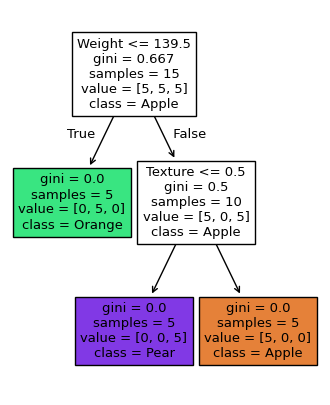

In [245]:
# Step 7: Visualize the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(4, 5))
plot_tree(clf, feature_names = ["Weight", "Texture"], class_names = fruitEncoder.classes_, filled = True)
plt.show()

# Note that this mataches with the decisiontree we described earlier. How cool is that!